# Data Visualization

In this notebook, we are going to visualize our dataset. The aim of this step is to better understand the data, gain insights about the underlying patterns and relationships between variables, and to inform our subsequent data preprocessing and machine learning steps.

This step is crucial because it helps us to visualize the distributions and relationships of the data. Also, it assists us in detecting any outliers or errors that might exist in our data.

### Import necessary libraries
Before we start, let's import the libraries we will need.

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset
Now, let's load the dataset using pandas.

In [41]:
data = pd.read_csv('adult_data_preprocessed.csv')

data.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,<=50K,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Plotting histograms for continuous variables

### Age Distribution

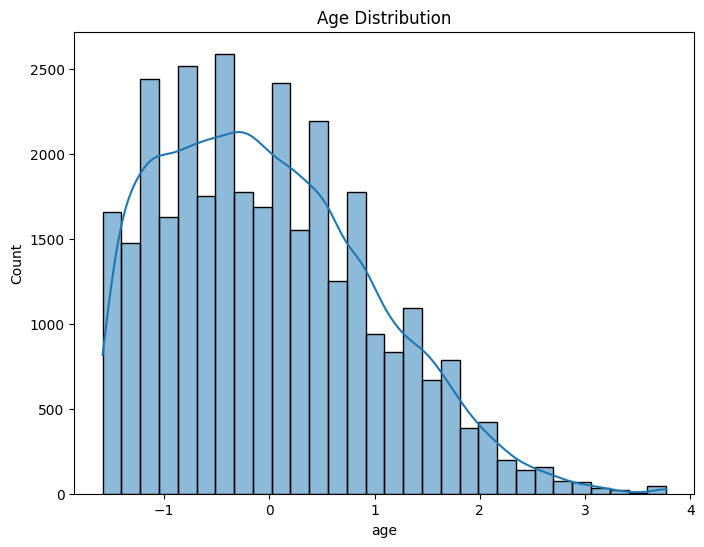

In [42]:
plt.figure(figsize=(8,6))
sns.histplot(data=data, x="age", bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

The histogram above represents the distribution of 'age' in our dataset. From the plot, we can infer the general shape of the age distribution. The distribution seems to be slightly right-skewed, indicating a larger number of younger individuals after standardization.

This might suggest that individuals who are younger relative to others in the dataset are more likely to be in the workforce, which could be a factor in determining whether an individual's income exceeds $50k a year. This is something that we will further explore in our machine learning models.

### Final Weight (fnlwgt) Distribution

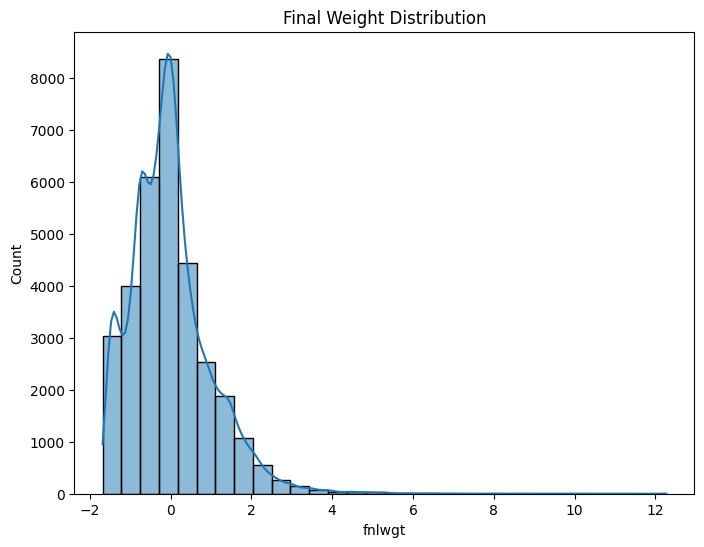

In [43]:
plt.figure(figsize=(8,6))
sns.histplot(data=data, x="fnlwgt", bins=30, kde=True)
plt.title("Final Weight Distribution")
plt.show()

The histogram above represents the distribution of 'fnlwgt' (final weight) in our dataset after standardization. From the plot, we can infer the general shape of the final weight distribution. The distribution is right-skewed, which is to be expected given the nature of the variable.

### 'education-num' Distribution

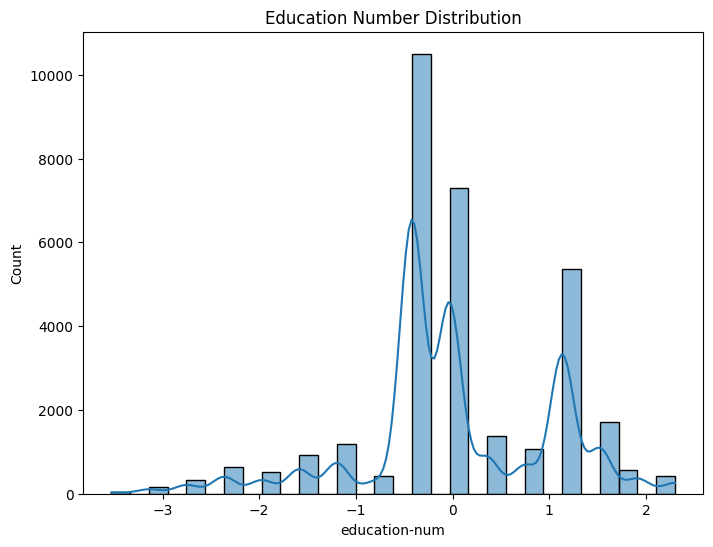

In [44]:
plt.figure(figsize=(8,6))
sns.histplot(data=data, x="education-num", bins=30, kde=True)
plt.title("Education Number Distribution")
plt.show()

The histogram above represents the distribution of 'education-num' (number of educational years completed) in our dataset after standardization. The distribution is multimodal, indicating there are several common levels of education among individuals in the dataset.

This variable is likely to be a crucial factor in our machine learning models, as the level of education often correlates with income level.

 ### 'capital-gain' Distribution

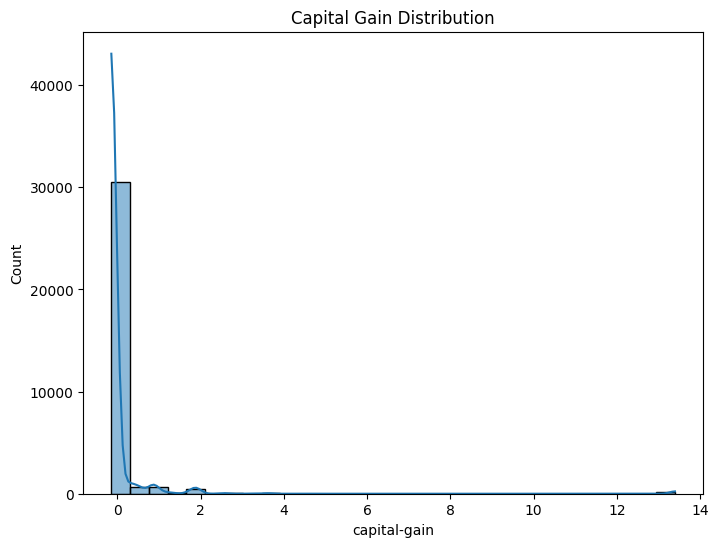

In [45]:
plt.figure(figsize=(8,6))
sns.histplot(data=data, x="capital-gain", bins=30, kde=True)
plt.title("Capital Gain Distribution")
plt.show()

The histogram above represents the distribution of 'capital-gain' in our dataset after standardization. A significant majority of individuals in our dataset have zero capital gain, which means that this feature might not contribute much to our final machine learning model. However, for those individuals with non-zero capital gain, this feature may be significant.

### 'capital-loss' Distribution

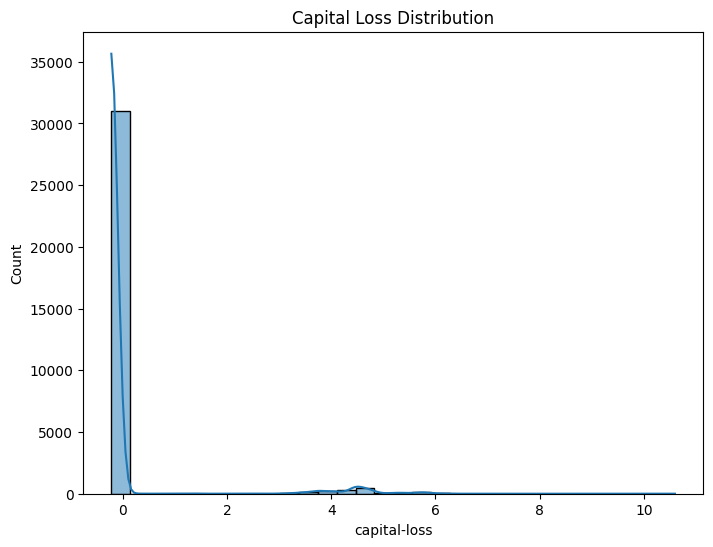

In [46]:
plt.figure(figsize=(8,6))
sns.histplot(data=data, x="capital-loss", bins=30, kde=True)
plt.title("Capital Loss Distribution")
plt.show()

The histogram above represents the distribution of 'capital-loss' in our dataset after standardization. Similar to 'capital-gain', the majority of individuals have no capital loss. This feature may not be informative for the majority of instances in our dataset but could be significant for instances with non-zero capital loss.

### 'hours-per-week' Distribution

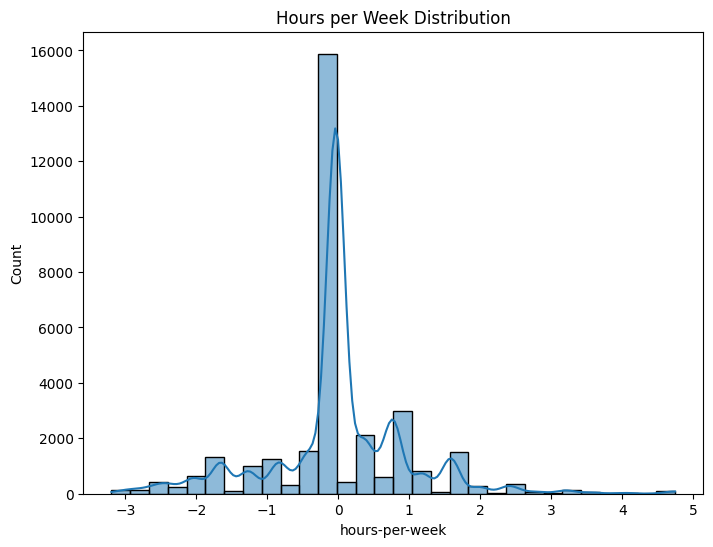

In [47]:
plt.figure(figsize=(8,6))
sns.histplot(data=data, x="hours-per-week", bins=30, kde=True)
plt.title("Hours per Week Distribution")
plt.show()

The histogram above represents the distribution of 'hours-per-week' in our dataset after standardization. From the plot, we can infer the general shape of the hours-per-week distribution. This variable could play a significant role in our machine learning models, as the number of hours worked per week might influence the income level.

### Categorical Feature Visualization
Due to preprocessing steps applied in the previous notebook, our categorical features have been one-hot encoded. Therefore, the categorical feature columns such as 'workclass', 'education', and 'marital-status' have been transformed into multiple binary columns. To analyze these, we need to group them back and visualize. For this purpose, we have defined two helper functions:

- `get_category_counts(data, prefix)`: This function accepts the DataFrame and the prefix of the columns that need to be grouped. It returns a Series object with the counts of each category under the given prefix.

- `plot_category_counts(category_counts, title)`: This function accepts the Series object returned from `get_category_counts()` and a title for the plot. It generates a bar plot of the category counts.

Using these functions, we will create bar plots for the 'workclass', 'education', and 'marital-status' features.

In [48]:
def get_category_counts(data, prefix):
    category_counts = data.filter(regex=f'^{prefix}_').sum()
    category_counts.index = category_counts.index.str.replace(f'{prefix}_', '')
    return category_counts.sort_values(ascending=False)

def plot_category_counts(category_counts, title):
    plt.figure(figsize=(10,6))
    sns.barplot(x=category_counts.index, y=category_counts.values)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

### Workclass Bar Plot

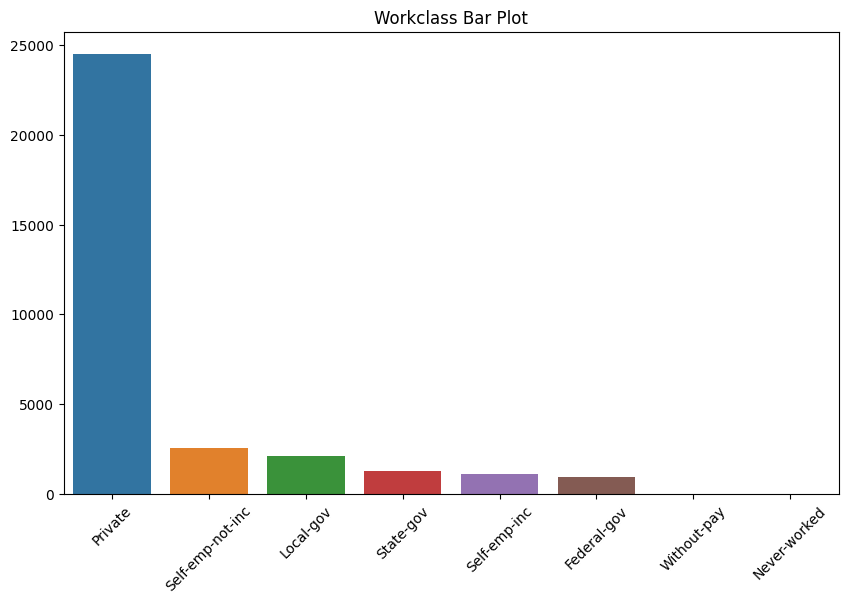

In [49]:
workclass_counts = get_category_counts(data, 'workclass')
plot_category_counts(workclass_counts, 'Workclass Bar Plot')

The 'Workclass Bar Plot' displays the distribution of data across various work classes. From the plot, it's clear that the majority of the individuals in the dataset are in the 'private' sector. The data is heavily imbalanced towards 'private' sector workers, which may suggest a potential bias in the predictive model towards patterns specific to 'private' workclass. It might indicate that the outcomes of our model may not generalize well for the minority classes.

### Education Bar Plot

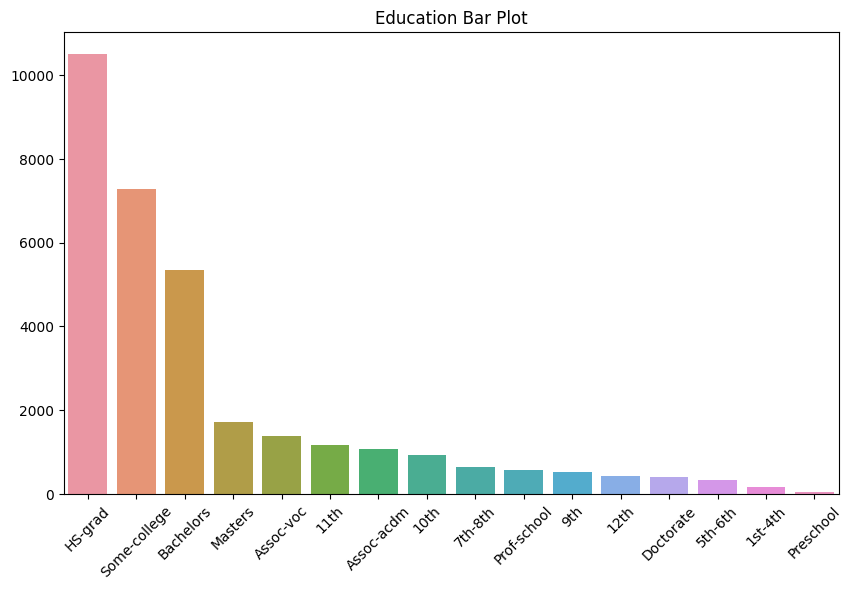

In [50]:
education_counts = get_category_counts(data, 'education')
plot_category_counts(education_counts, 'Education Bar Plot')

The 'Education Bar Plot' shows the distribution of individuals across different education levels. We can see that 'HS-grad' and 'Some-college' are the most common educational backgrounds, followed by 'Bachelors'. A large number of individuals in the dataset not possessing a higher degree may reflect a lower degree of educational attainment in the population, which could potentially affect income levels.

### Martial Status Bar Plot

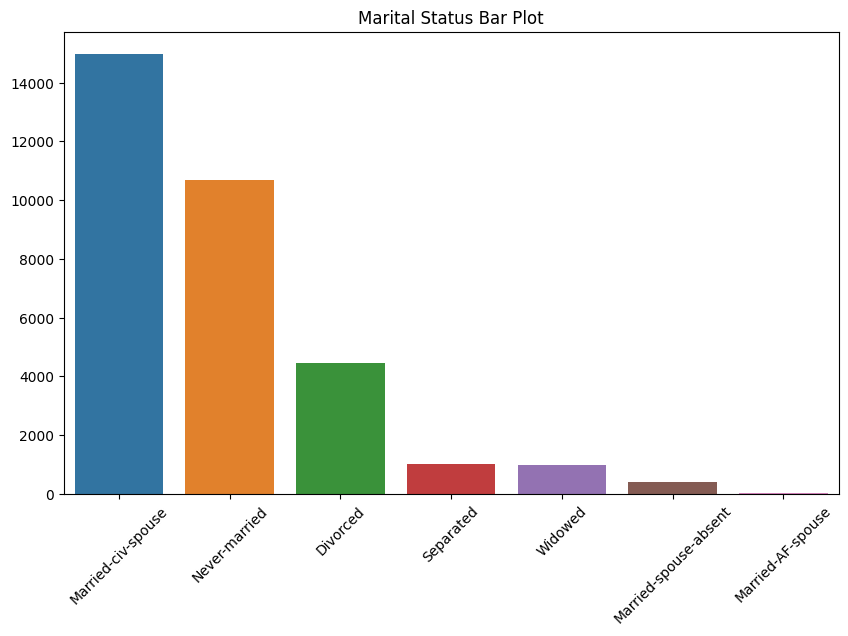

In [51]:
marital_status_counts = get_category_counts(data, 'marital-status')
plot_category_counts(marital_status_counts, 'Marital Status Bar Plot')

In the 'Marital Status Bar Plot', we see that most of the individuals are 'Married-civ-spouse' followed by 'Never-married' and 'Divorced'. This might suggest that marital status, specifically being married to a civilian spouse, might play a role in higher income levels. It's important to note that correlations observed in exploratory data analysis should not be considered as causative without further investigation.

### Income Bar Plot

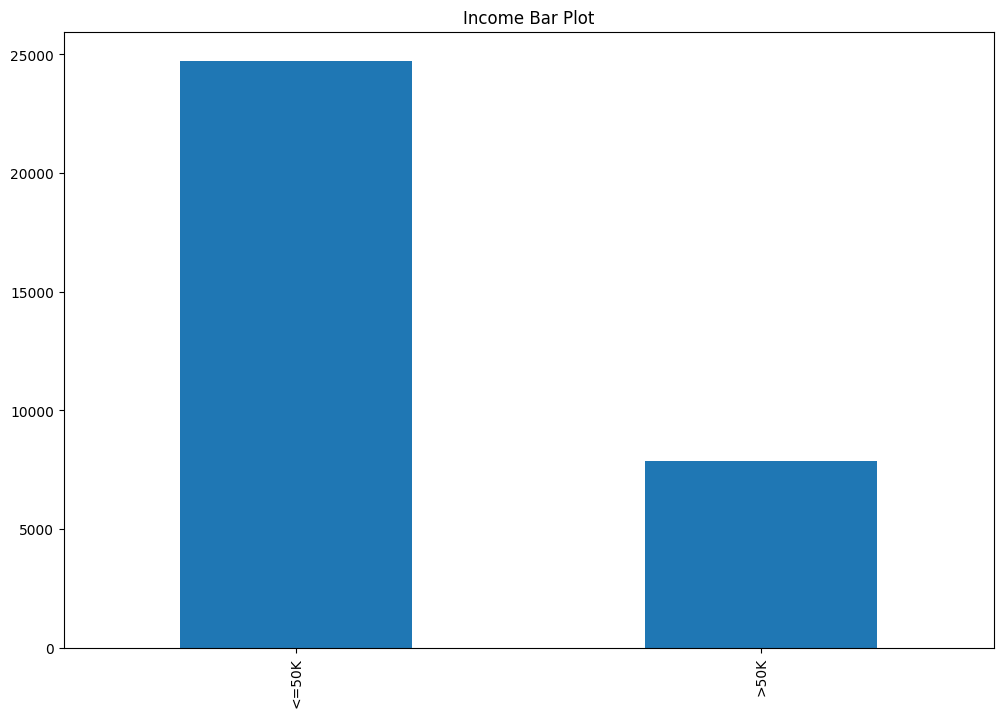

In [52]:
plt.figure(figsize=(12,8))
data['income'].value_counts().plot(kind='bar')
plt.title('Income Bar Plot')
plt.show()

From the 'Income Bar Plot', we can observe that a majority of individuals in our dataset earn less than 50K. This might be due to a variety of factors such as their education level, age, or occupation. We need to be aware that our model's predictions might be influenced by this imbalanced distribution.

### Correlation Analysis

Correlation analysis is a statistical method used to evaluate the strength of relationship between two quantitative variables. A high correlation means that two or more variables have a strong relationship with each other, while a weak correlation means that the variables are hardly related.

Let's create a correlation matrix and plot a heatmap for better visualization.

### Simplified Correlation Analysis

Due to the high number of features in our dataset after one-hot encoding, it's more beneficial to focus on originally numerical columns for the correlation analysis. Let's create a correlation matrix and a heatmap for 'age', 'education_num', 'capital_gain', 'capital_loss' and 'hours_per_week' columns.

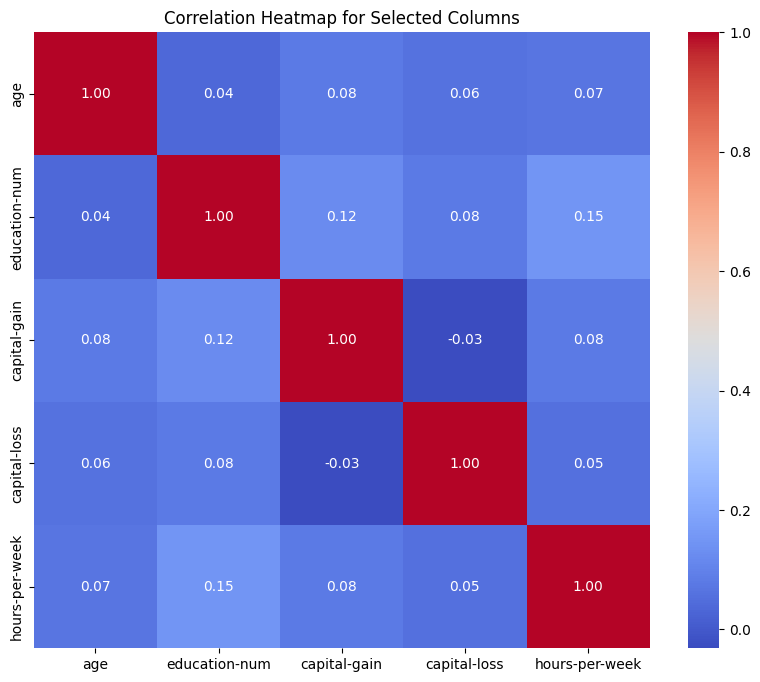

In [53]:
selected_columns = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
corr = data[selected_columns].corr()

plt.figure(figsize=(10,8))

sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap for Selected Columns')
plt.show()

From the 'Correlation Heatmap for Selected Columns', we observe that none of the selected features exhibit strong correlation with each other. The highest correlation coefficient of 0.15 is between 'eduaction-num' and 'hours-per-week'. However, this is still a weak positive correlation, suggesting that there is a slight tendency for older individuals to work more hours per week.

On the other hand, 'capital-gain' and 'capital-loss' do not show any significant correlation with the other selected features, indicating that these variables act independently.

It's worth noting that the weak correlations suggest that our selected features are relatively unique in explaining our target variable, which is a good characteristic for predictive modeling.

### Box Plots for Categorical vs Numerical Variables

Box plots are a great way to visualize the relationship between categorical and numerical variables. In the following sections, we will be creating box plots to analyze the relationship between 'income' and other numerical features, which are 'age', 'education-num', 'capital-gain', 'capital-loss' and 'hours-per-week'.

### Box plot for 'age' vs 'income'

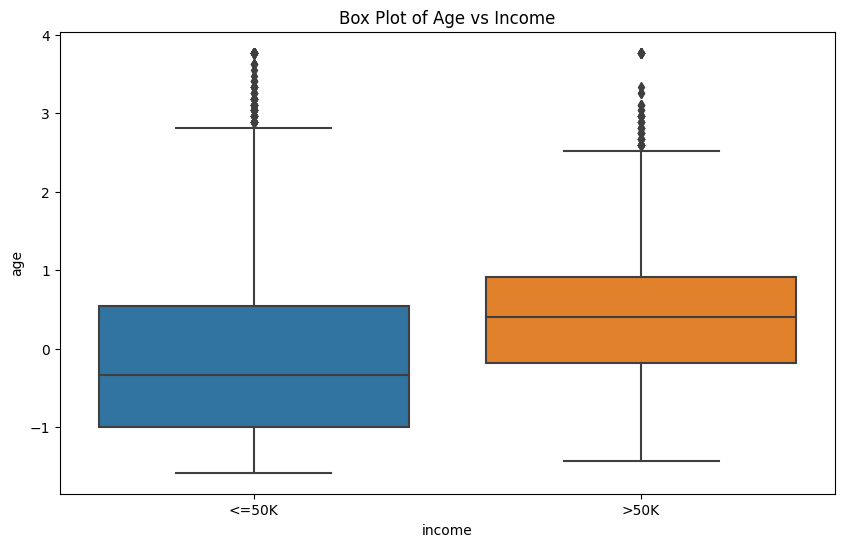

In [54]:
plt.figure(figsize=(10,6))
sns.boxplot(x='income', y='age', data=data)
plt.title('Box Plot of Age vs Income')
plt.show()

The box plot of 'Age' vs 'Income' reveals that individuals with income more than 50K tend to be older than those earning less than 50K. This suggests that age might be an important feature in predicting income.

### Box plot for 'education-num' vs 'income'

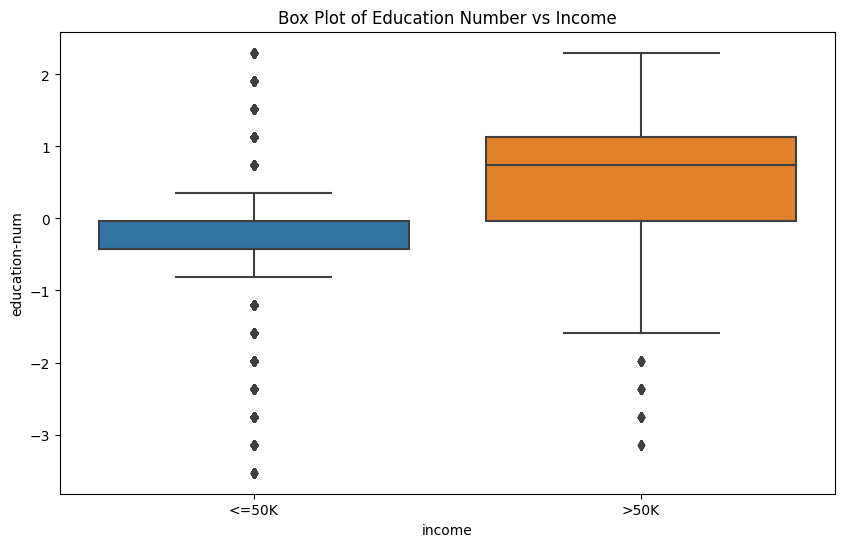

In [55]:
plt.figure(figsize=(10,6))
sns.boxplot(x='income', y='education-num', data=data)
plt.title('Box Plot of Education Number vs Income')
plt.show()

From the box plot of 'Education Number' vs 'Income', we can observe that individuals with income more than 50K tend to have more years of education compared to those earning less than 50K. This indicates that the number of years of education might be a significant factor in predicting income.

### Box plot for 'capital-gain' vs 'income'

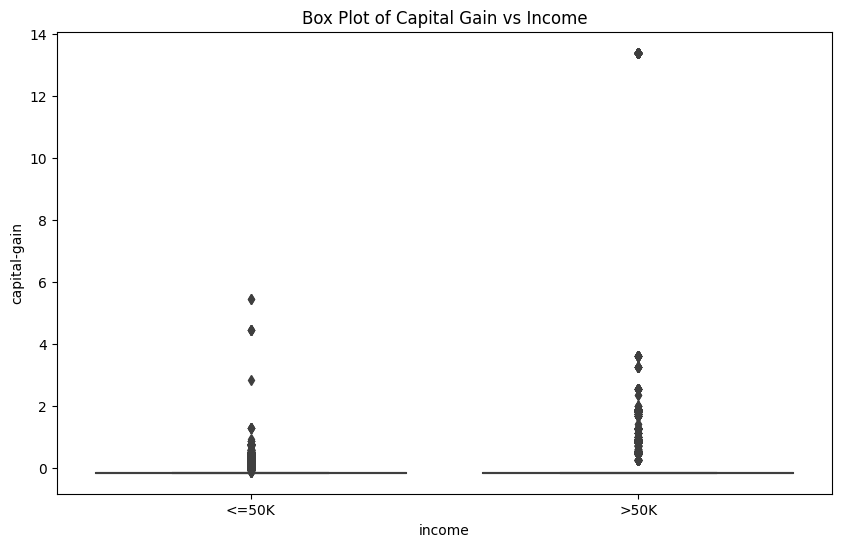

In [56]:
plt.figure(figsize=(10,6))
sns.boxplot(x='income', y='capital-gain', data=data)
plt.title('Box Plot of Capital Gain vs Income')
plt.show()

### Box plot for 'capital-loss' vs 'income'

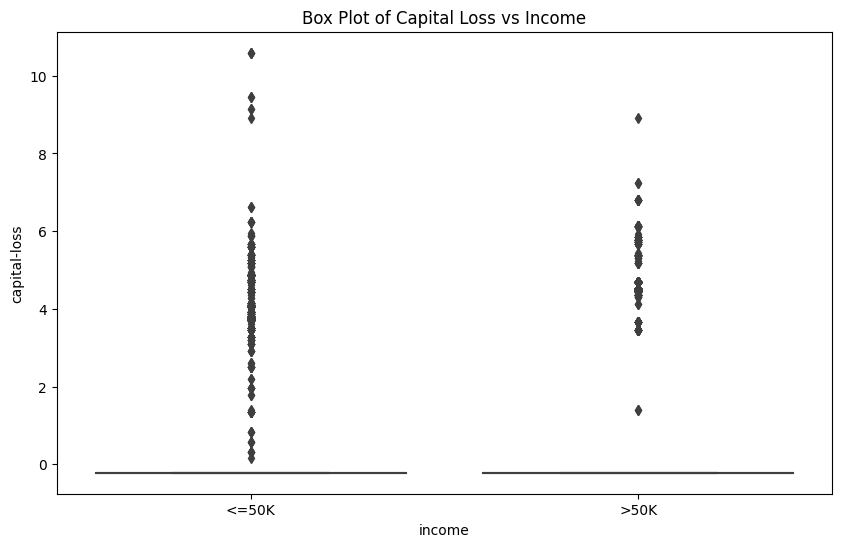

In [57]:
plt.figure(figsize=(10,6))
sns.boxplot(x='income', y='capital-loss', data=data)
plt.title('Box Plot of Capital Loss vs Income')
plt.show()

The box plots of 'Capital Gain' and 'Capital Loss' vs 'Income' show that these variables may have different distributions for individuals earning more or less than 50K. However, due to the large number of zeros in these variables, it might be challenging to draw definitive conclusions. Further analysis, such as calculating the proportion of non-zero capital gains and losses for the two income groups, could provide more insights.

### Box plot for 'hours-per-week' vs 'income'

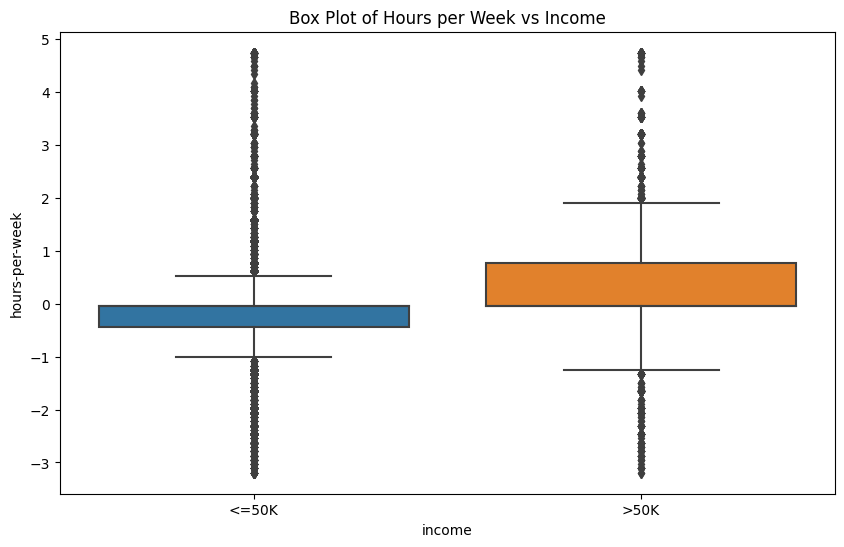

In [58]:
plt.figure(figsize=(10,6))
sns.boxplot(x='income', y='hours-per-week', data=data)
plt.title('Box Plot of Hours per Week vs Income')
plt.show()

The box plot of 'Hours per Week' vs 'Income' suggests that individuals earning more than 50K tend to work slightly longer hours compared to those earning less than 50K. This implies that the number of work hours per week might play a role in income prediction.

### Bar Plots of Categorical Variables with Binary Values

In our preprocessed data, the original categorical columns have been transformed into binary columns by the 'get_dummies()' function. This means, for instance, the original 'gender' column has now become two columns: 'gender_Male' and 'gender_Female'.

Let's create bar plots for these binary variables. In these columns, a value of 1 represents the presence of the category in the column name, while a value of 0 represents the absence. This means, for example, that 'gender_Male' will also provide information about females, and vice versa.

Firstly, we will visualize the distribution of income among males and females:

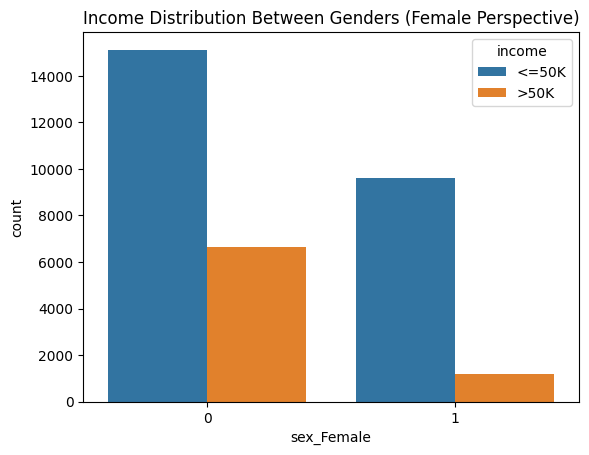

In [59]:
sns.countplot(data=data, x='sex_Female', hue='income')
plt.title('Income Distribution Between Genders (Female Perspective)')
plt.show()


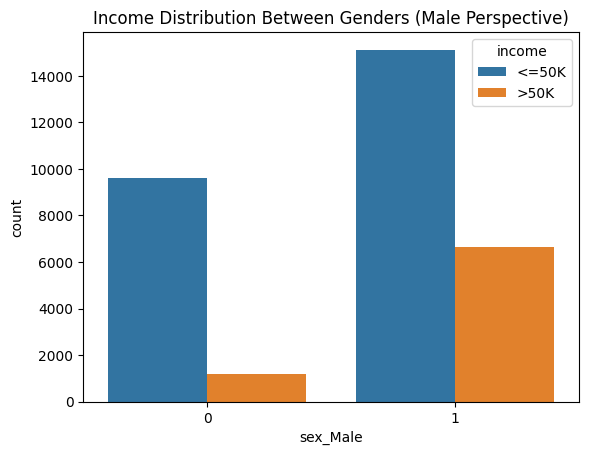

In [60]:
sns.countplot(data=data, x='sex_Male', hue='income')
plt.title('Income Distribution Between Genders (Male Perspective)')
plt.show()

From these plots, we observe that a larger proportion of men tend to have an income above 50K than women. This could be due to a variety of societal factors, such as the gender wage gap or occupational segregation. It also brings into question whether the men in this dataset work in higher-paying industries or positions than women. This is a significant insight as it might influence the features we give more importance to while building our predictive models.

### Workclass perspective

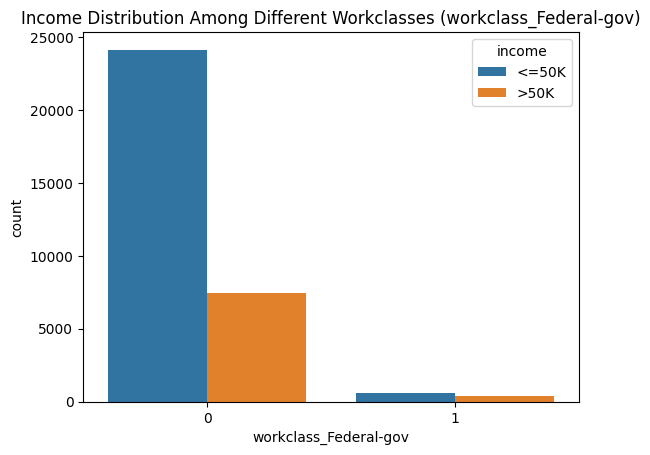

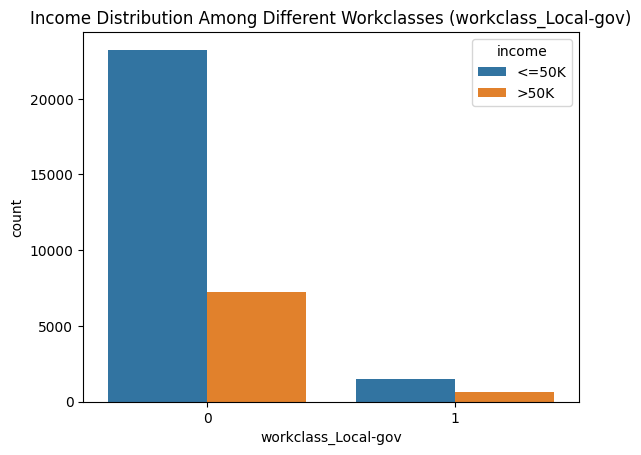

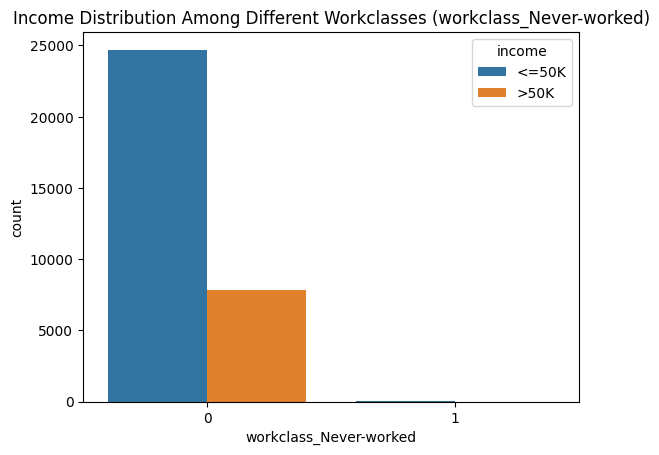

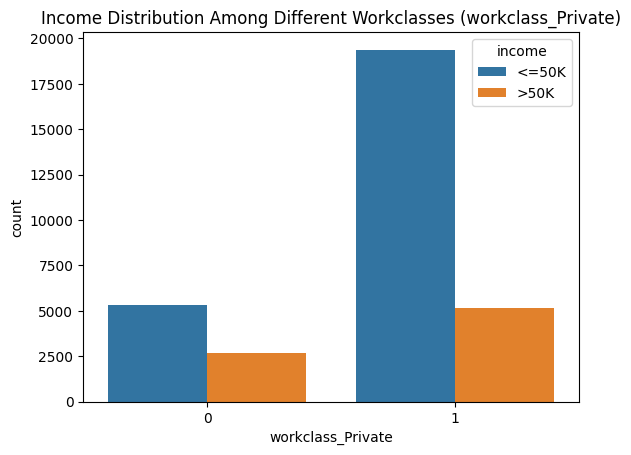

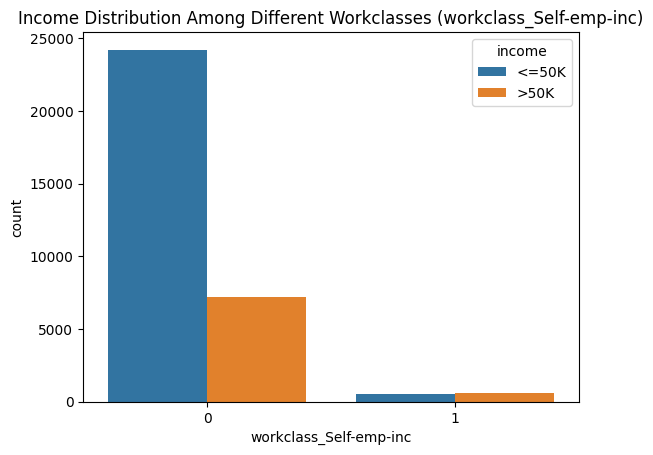

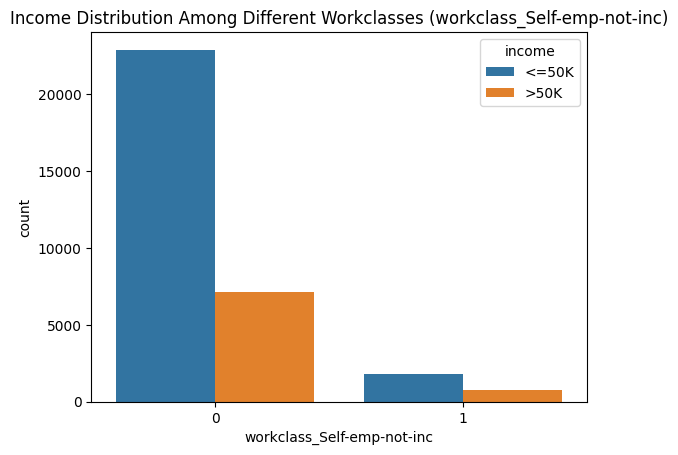

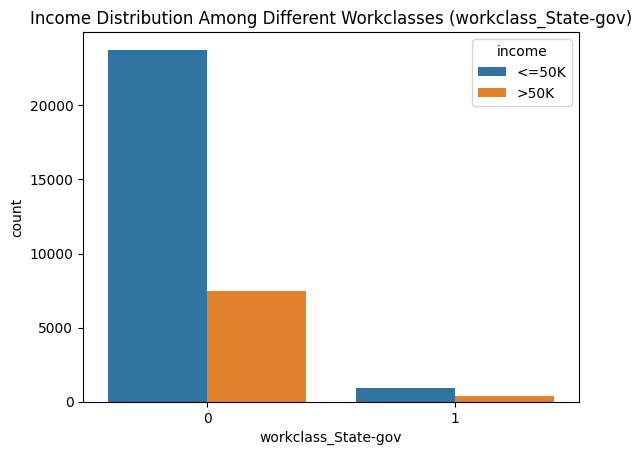

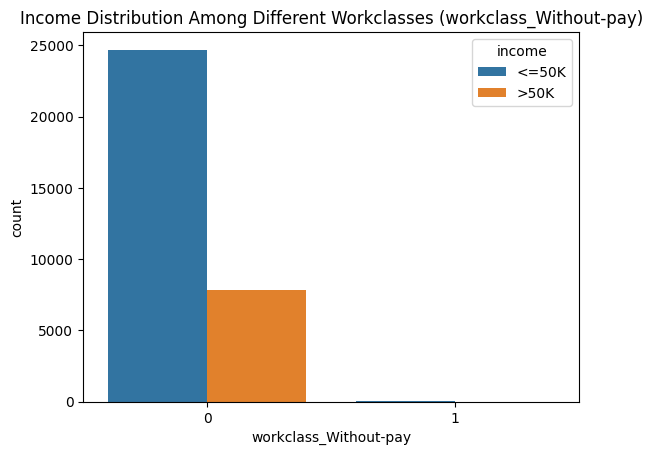

In [61]:
for col in data.columns:
    if "workclass" in col:
        sns.countplot(data=data, x=col, hue='income')
        plt.title(f'Income Distribution Among Different Workclasses ({col})')
        plt.show()

The distribution of income across workclasses can highlight the impact of the type of employment on income levels. For instance, we might find that certain workclasses such as 'Self-emp-inc' have a higher proportion of people with an income above 50K. This could indicate that self-employed individuals who incorporate their businesses are more likely to have higher incomes. Understanding these dynamics can help us develop more nuanced models and also provide valuable socio-economic insights.

### Race perspective

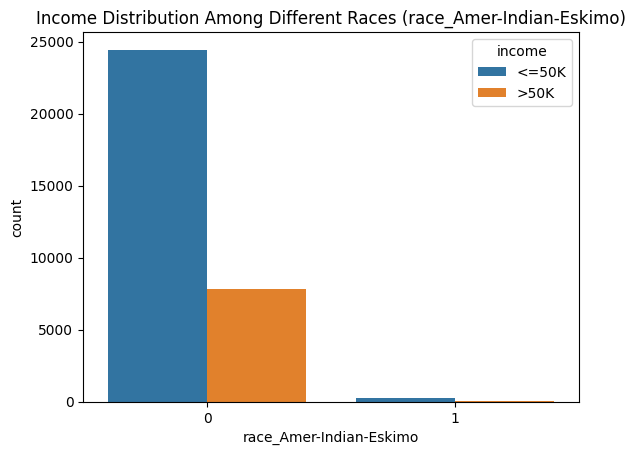

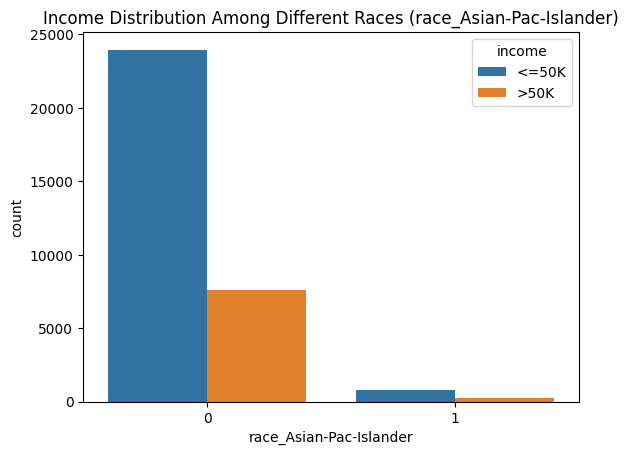

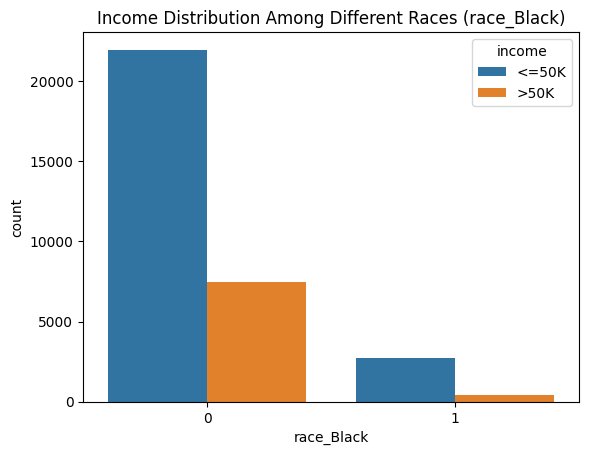

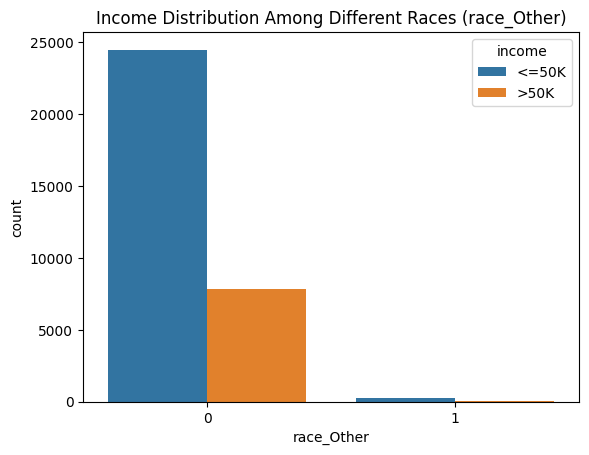

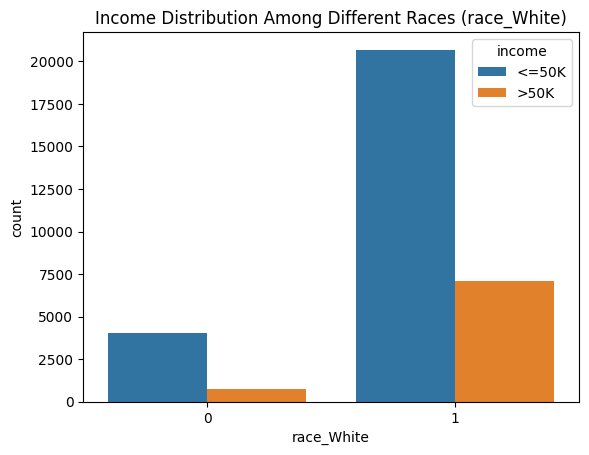

In [62]:
for col in data.columns:
    if "race" in col:
        sns.countplot(data=data, x=col, hue='income')
        plt.title(f'Income Distribution Among Different Races ({col})')
        plt.show()

Studying income distribution across different races can help uncover potential racial disparities in income. Such insights could indicate systemic issues contributing to income inequality among different racial groups. From a predictive model building perspective, understanding these distributions could help us in feature selection and interpreting the model results better.

### Marital-status perspective

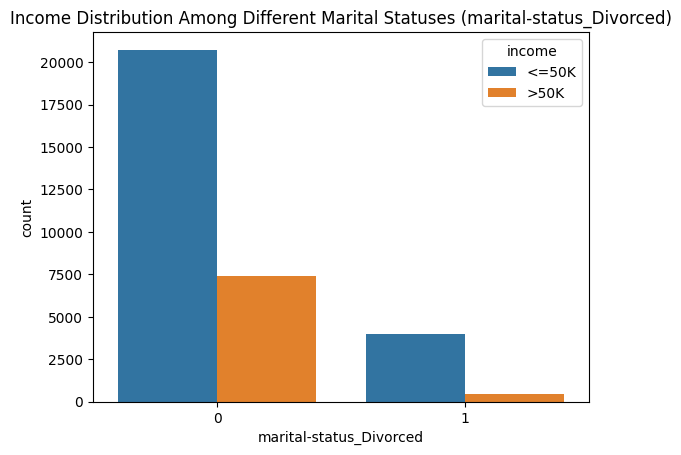

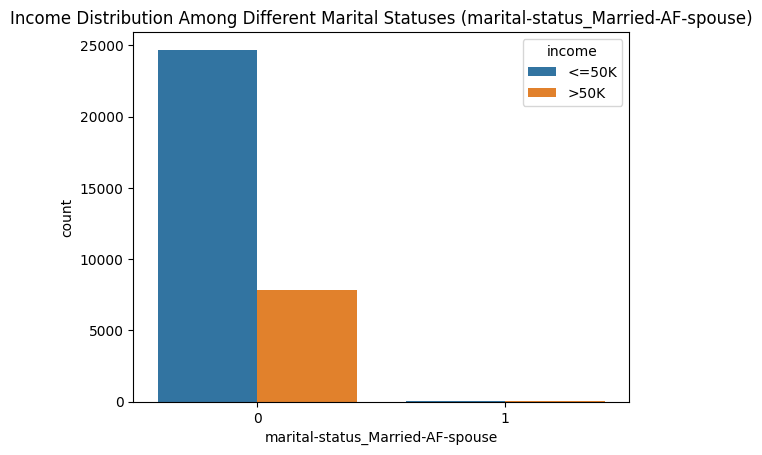

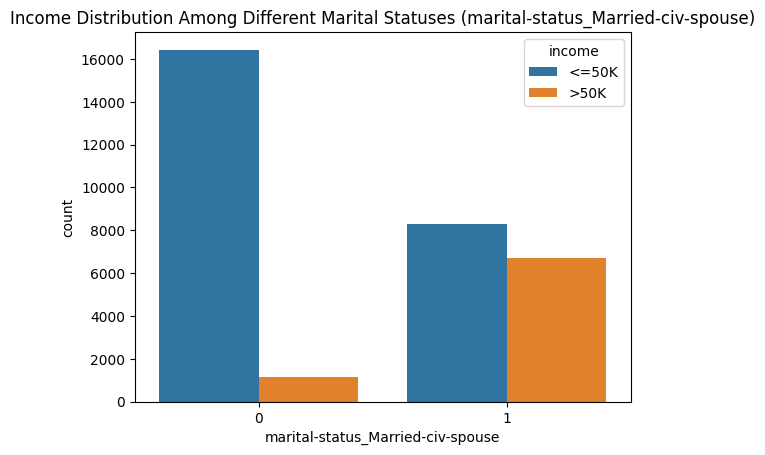

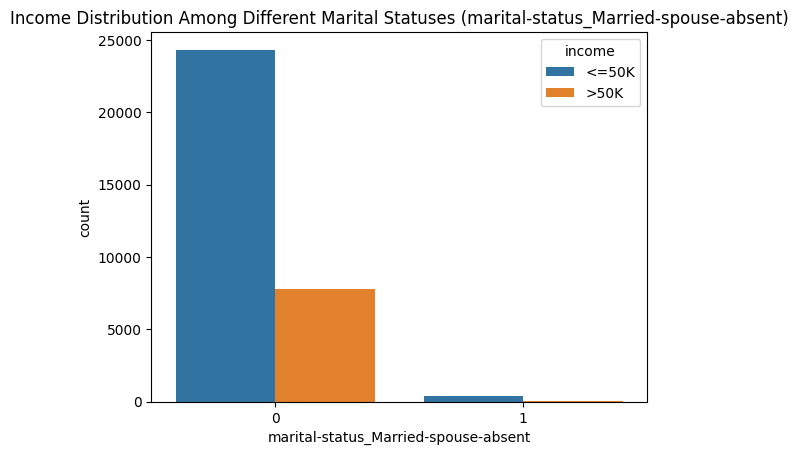

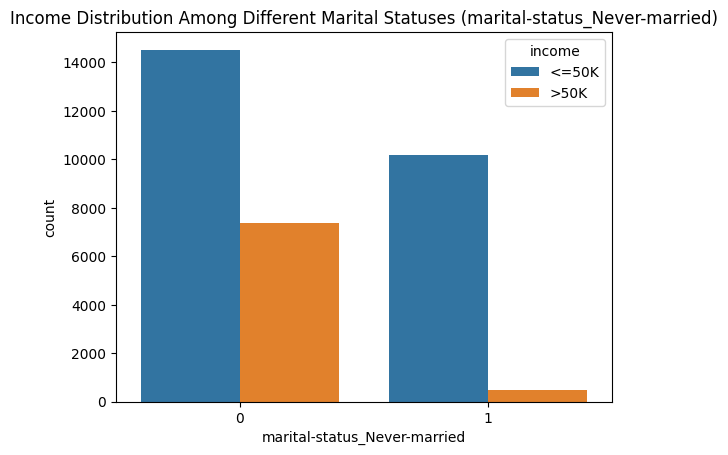

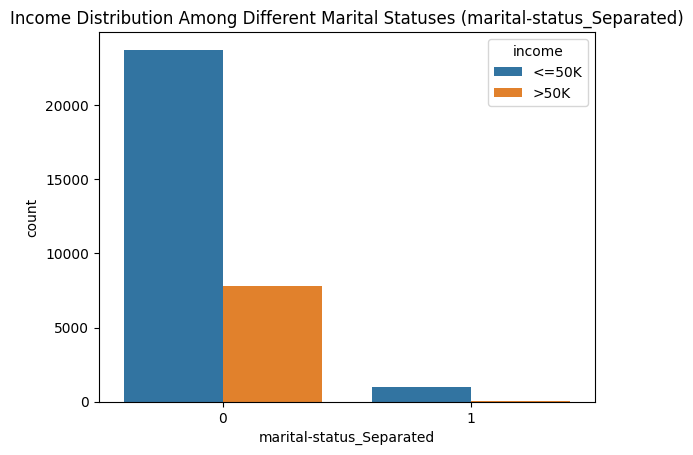

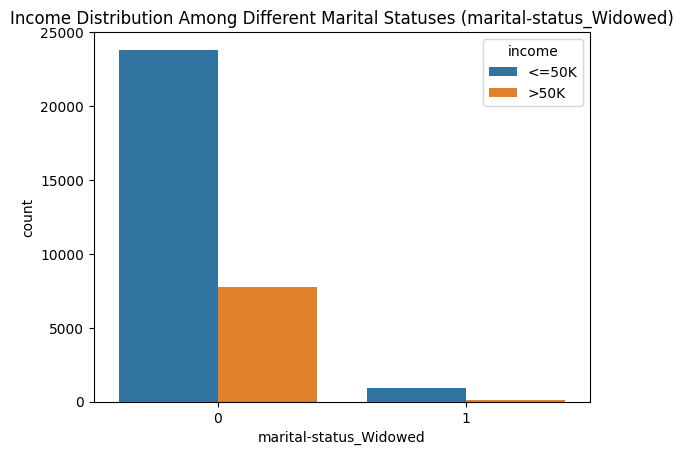

In [63]:
for col in data.columns:
    if "marital-status" in col:
        sns.countplot(data=data, x=col, hue='income')
        plt.title(f'Income Distribution Among Different Marital Statuses ({col})')
        plt.show()

This allows us to understand how marital status may impact income. For example, we might observe that 'Married-civ-spouse' individuals have a higher proportion of incomes over 50K. This could be due to a variety of factors such as combined household income, stability, age, and more. This information can provide a valuable context for our predictive modeling.

### Generate scatter plots to visualize relationships between pairs of variables

Scatter plots are powerful data visualization tools that can expose correlations, patterns, outliers and much more. With scatter plots, we can understand the impact of multiple attributes on the output at the same time. Here, we are going to visualize how 'education_num' (number of education years) influences 'hours_per_week' (working hours per week).

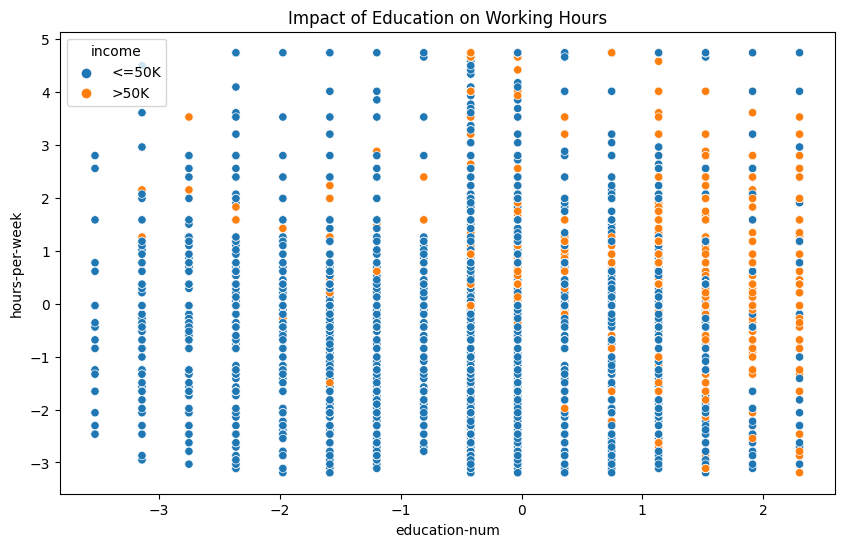

In [64]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='education-num', y='hours-per-week', hue='income')
plt.title('Impact of Education on Working Hours')
plt.show()

From the scatter plot, we can observe that there is no significant correlation between the number of years of education and the number of hours worked per week. It means that the number of hours an individual works per week doesn't necessarily increase with the increase in education level. The income levels (>50K and <=50K) are also spread across all levels of education and hours worked per week, indicating no direct relationship between these variables.



### Scatter Plot of 'capital-gain' vs 'hours-per-week'

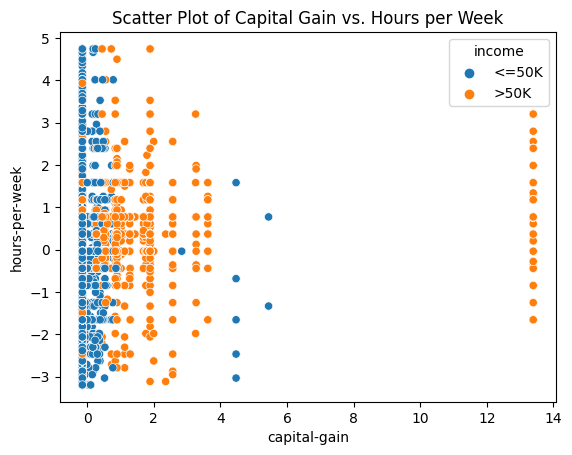

In [65]:
sns.scatterplot(x='capital-gain', y='hours-per-week', hue='income', data=data)
plt.title('Scatter Plot of Capital Gain vs. Hours per Week')
plt.show()

We observe that individuals with higher capital gains tend to work longer hours, but this is not always the case. Furthermore, higher income is more frequent among individuals with higher capital gains, especially among those who work longer hours.

### Scatter Plot of 'capital-loss' vs 'hours-per-week'

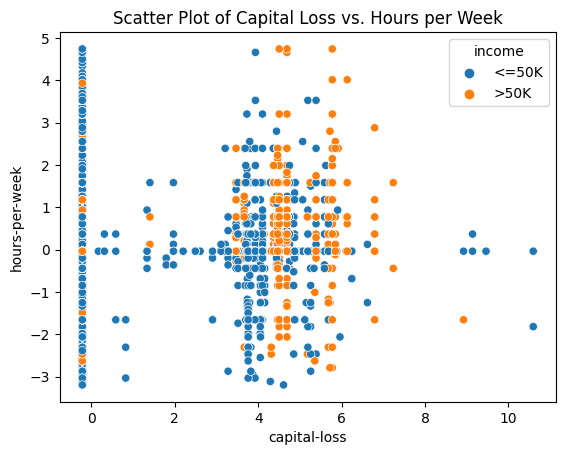

In [66]:
sns.scatterplot(x='capital-loss', y='hours-per-week', hue='income', data=data)
plt.title('Scatter Plot of Capital Loss vs. Hours per Week')
plt.show()

We can see that individuals with higher capital losses tend to work longer hours. However, there is no clear pattern regarding the relationship between capital loss and income level. Higher capital losses are not associated with lower income, indicating that other factors are at play when determining income level.

### Violin Plots to Show Distribution and Basic Statistics of Numerical Variables Across Categories

### Violin Plot for 'education-num' across 'income'

The violin plot is a great tool to visualize the distribution of numerical variables across different categories. In this case, we will generate a violin plot for 'education-num' across different 'income' categories.

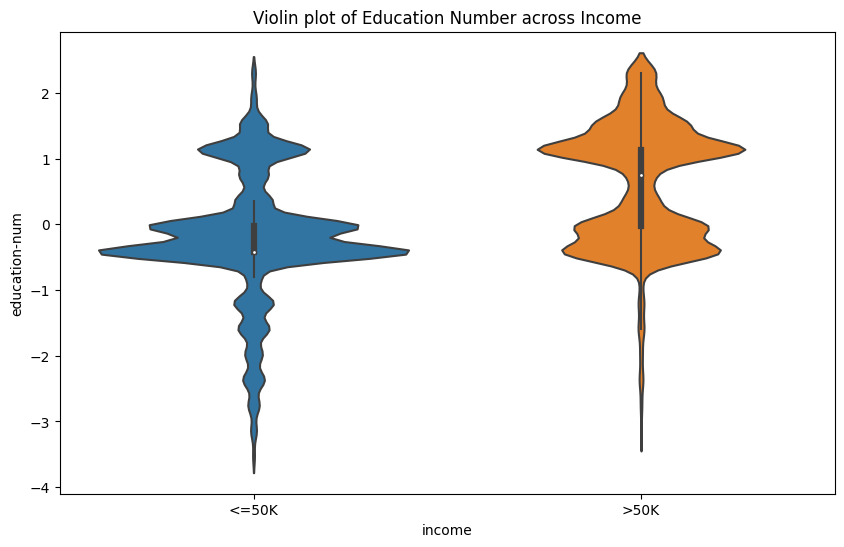

In [67]:
plt.figure(figsize=(10,6))
sns.violinplot(x='income', y='education-num', data=data)
plt.title('Violin plot of Education Number across Income')
plt.show()

From this plot, we can observe that individuals with income >50K tend to have higher education levels compared to those with income <=50K. This indicates that higher education levels might be positively correlated with higher income.

### Violin Plot for 'hours-per-week' across 'income'

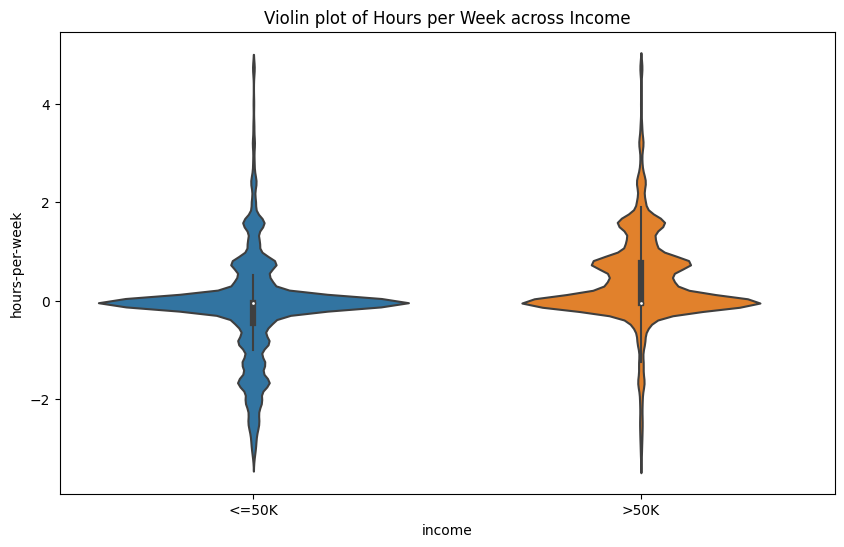

In [68]:
plt.figure(figsize=(10,6))
sns.violinplot(x='income', y='hours-per-week', data=data)
plt.title('Violin plot of Hours per Week across Income')
plt.show()

In this plot, we can see that individuals with income >50K tend to work longer hours compared to those with income <=50K. However, the difference is not significant and both distributions are quite similar. This suggests that working longer hours doesn't necessarily lead to higher income.

### Violin Plot for 'capital-gain' across 'income'

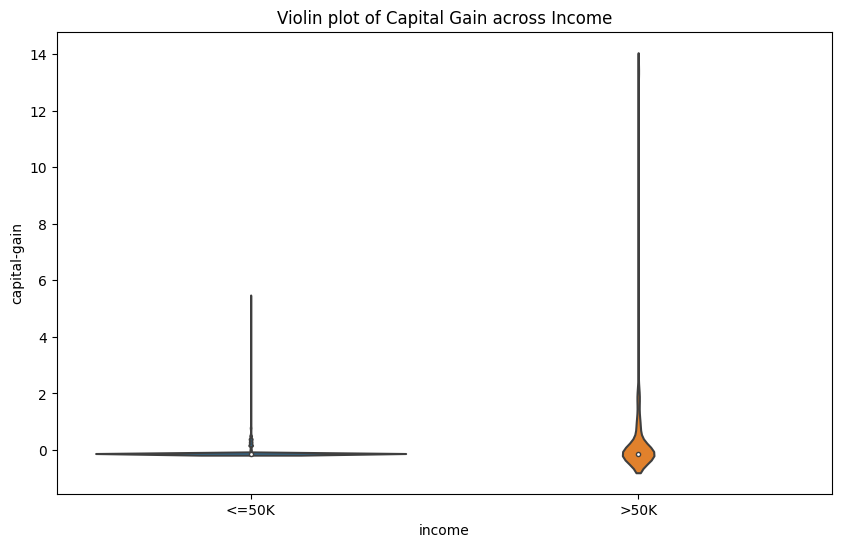

In [69]:
plt.figure(figsize=(10,6))
sns.violinplot(x='income', y='capital-gain', data=data)
plt.title('Violin plot of Capital Gain across Income')
plt.show()

From this plot, it's evident that individuals with income >50K have a wider range of capital gains compared to those with income <=50K. This implies that higher capital gains might be associated with higher income.

## Summary
In this notebook, we thoroughly explored and visualized our dataset to gain a better understanding of the underlying patterns and correlations. We started by plotting histograms for continuous variables (age, education-num, hours-per-week, capital-gain, and capital-loss) and identified the distributions of these features. We also detected potential outliers in numerical data using box plots.

Next, we plotted bar charts for categorical variables to examine the counts of different categories. In the process, we identified which categories were predominant in our dataset. We also created a correlation matrix for numerical variables and visualized it using a heatmap, which revealed interesting correlations between features.

Afterward, we generated scatter plots to visualize the relationships between pairs of variables, which provided us with insight into how variables interact with each other.

Finally, we constructed violin plots to show the distribution and basic statistics of numerical variables across categories and visualized the distribution of variables with respect to the target variable using another set of bar plots.

## Business Summary
From a business perspective, this data exploration process is essential as it allows us to understand the factors that contribute to a person's income level. The various visualizations have revealed some key findings. For instance, we found that age, hours worked per week, and education level are strongly correlated with income. This information can be crucial for policymakers and businesses who aim to target specific demographic groups.

We also found out that there are significant income differences across different work classes and occupations, suggesting that these factors could play a crucial role in income disparity. Understanding these patterns can help us devise better models to predict income, which can be instrumental in various applications such as targeted advertising, policy-making, and social research.